# Exploratory Data Analysis (EDA) - Melanoma Detection

In this notebook, we provide a brief exploratory data analysis based on the dataset used by the SIIM-ISIC Melanoma Classification Challenge. More specifically, we make use of the ISIC 2020 Challenge Dataset https://doi.org/10.34970/2020-ds01 (c) by ISDIS, 2020. This dataset was generated by the International Skin Imaging Collaboration (ISIC) and images are from the following sources: Hospital Clínic de Barcelona, Medical University of Vienna, Memorial Sloan Kettering Cancer Center, Melanoma Institute Australia, The University of Queensland, and the University of Athens Medical School. (See https://challenge2020.isic-archive.com/ for more details.) 

The goal of this project is to predict a binary target for each image. Our model should predict the probability (floating point) between 0.0 and 1.0 that the lesion in the image is malignant (the target). In the training data, train.csv, the value 0 denotes benign, and 1 indicates malignant.

## Imports

In [1]:
!pip install seaborn

import warnings
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.show()

## Reading the Datasets

In [2]:
train_df = pd.read_csv('../data/train_with_folds.csv')
test_df = pd.read_csv('../data/test.csv')

print('Training data shape: ', train_df.shape)
train_df.head()

Training data shape:  (33126, 12)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,kfold
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,9
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,3
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,5
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,2
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,5


In [3]:
print('Test data shape: ', test_df.shape)
test_df.head()

Test data shape:  (10982, 7)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,width,height
0,ISIC_0052060,IP_3579794,male,70.0,NaN,6000,4000
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,6000,4000
2,ISIC_0058510,IP_7960270,female,55.0,torso,6000,4000
3,ISIC_0073313,IP_6375035,female,50.0,torso,6000,4000
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,1920,1080


In [4]:
train_df.groupby(['benign_malignant']).count()['sex'].to_frame()

,sex
benign_malignant,
benign,32477
malignant,584


We observe that the dataset is extremely skewed since only 584/(584+32477) images contain melanoma. This is essential to keep in mind while creating the different training folds.

## Data Exploration

In [5]:
print('Train Set')
print(train_df.info())
print('-------------')
print('Test Set')
print(test_df.info())

Train Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
 11  kfold                          33126 non-null  int64  
dtypes: float64(1), int64(5), object(6)
m

There are null values present in our datasets. For this project, we will only focus on the image and use deep learning to predict a binary target for each image, which means that none of these null values are significantly impacting our goal.

Text(0.5, 1.0, 'benign (0) vs malignant (1) based on sex')

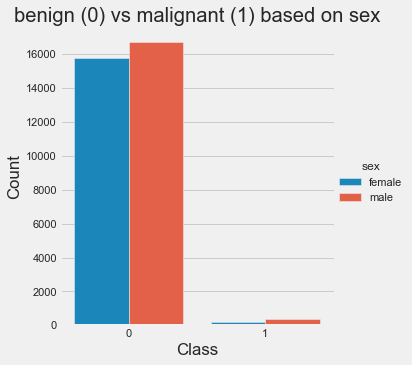

In [6]:
sex_vs_target = train_df.groupby(['target', 'sex'])['benign_malignant'].count().to_frame().reset_index()
sns.catplot(x='target', y='benign_malignant', hue='sex', data=sex_vs_target, kind='bar')
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('benign (0) vs malignant (1) based on sex')

In [7]:
benign = train_df[train_df['benign_malignant']=='benign']
malignant = train_df[train_df['benign_malignant']=='malignant']

### Display Benign Images

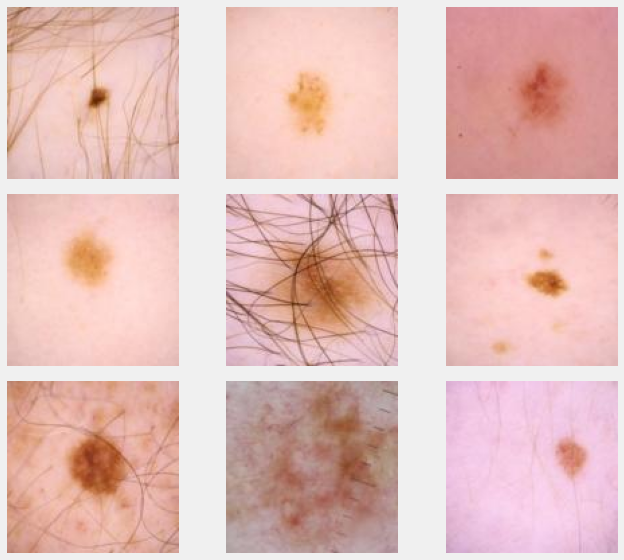

In [8]:
img_dir = '../data/train_resized/'

images = benign['image_name'].values
random_images = [np.random.choice(images+'.jpg') for i in range(9)]

plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()   

### Display Malignant Images

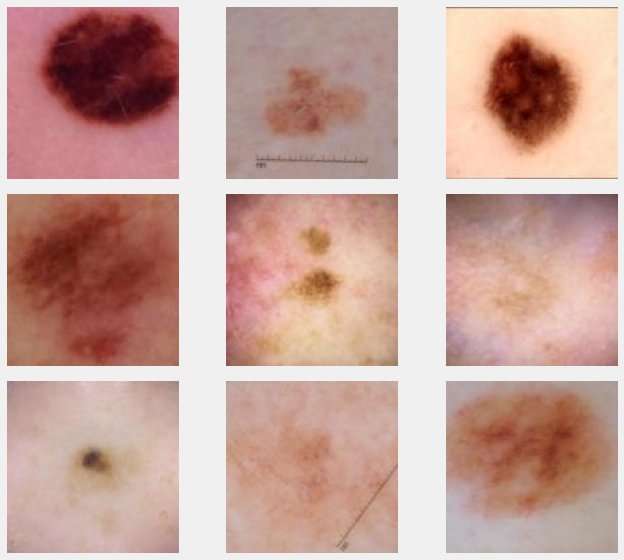

In [9]:
img_dir = '../data/train_resized/'

images = malignant['image_name'].values
random_images = [np.random.choice(images+'.jpg') for i in range(9)]

plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()   